In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
bert_raw_neighbours = pd.read_csv('results/bert_raw_neighbours.csv',index_col = 0)
count_word_raw = pd.read_csv('results/count_word_raw.csv',index_col = 0)
tfidf_word_raw = pd.read_csv('results/tfidf_word_raw.csv', index_col=0)

bert_sims = pd.read_csv('results/bert_sims.csv',index_col = 0)
count_word_sims = pd.read_csv('results/count_word_sims.csv',index_col = 0)
count_char_sims = pd.read_csv('results/count_char_sims.csv',index_col = 0)
tfidf_word_sims = pd.read_csv('results/tfidf_word_sims.csv',index_col = 0)
tfidf_char_sims = pd.read_csv('results/tfidf_char_sims.csv',index_col = 0)

pd.set_option('display.max_rows', None)

### Results - 'Raw' classifiers

In [42]:
raw_df = count_word_raw.append(bert_raw_neighbours).append(tfidf_word_raw).groupby(['type','model','analyzer','measure','neighbours']).max()[['bcubed_P','bcubed_R','bcubed_F1','P','R','F1']]
raw_df

bcubed_P  bcubed_R  bcubed_F1  \
type model analyzer measure neighbours                                  
raw  bert  bert     False   1           0.698351  0.759463   0.599614   
                            2           0.729922  0.708866   0.578587   
                            3           0.627255  0.779847   0.553190   
                            False       0.706499  0.690680   0.559135   
     count word     False   1           0.783969  0.488936   0.433374   
                            2           0.784316  0.477801   0.424013   
                            3           0.814599  0.446996   0.414819   
                            False       0.700389  0.691106   0.508812   
     tfidf word     False   1           0.682987  0.691228   0.537322   
                            2           0.715158  0.649737   0.534662   
                            3           0.761338  0.565341   0.486594   
                            False       0.513337  0.877014   0.487297   

                                               P         R        F1  
type model analyzer measure neighbours                                
raw  bert  bert     False   1           0.616701  0.533981  0.572368  
                            2           0.537821  0.594021  0.564526  
                            3           0.625802  0.473429  0.539055  
                            False       0.500907  0.493868  0.497363  
     count word     False   1           0.440351  0.401790  0.397947  
                            2           0.440351  0.401790  0.397947  
                            3           0.440351  0.401790  0.397947  
                            False       0.440351  0.401790  0.397947  
     tfidf word     False   1           0.547882  0.290626  0.374053  
                            2           0.547882  0.290626  0.374053  
                            3           0.547882  0.290626  0.374053  
                            False       0.547882  0.290626  0.374053

### Effect van aantal neighbours op scores 
##### (Meer neighbours geeft meer Recall maar minder Precision)

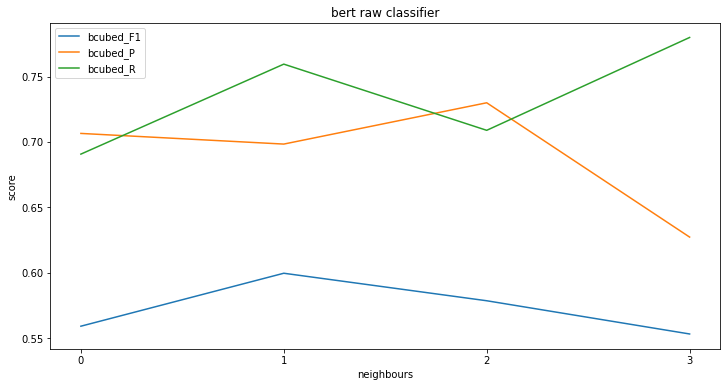

In [129]:
fig = plt.figure(figsize=(12,6))
plt.title('bert raw classifier')
plt.plot([0,1,2,3], bert_raw_neighbours['bcubed_F1'])
plt.plot([0,1,2,3], bert_raw_neighbours['bcubed_P'])
plt.plot([0,1,2,3], bert_raw_neighbours['bcubed_R'])
plt.xlabel('neighbours')
plt.ylabel('score')
plt.xticks(np.arange(0, 4))
plt.legend(['bcubed_F1','bcubed_P','bcubed_R'], loc='upper left')
plt.show()

### Best results per raw classifier

In [43]:
raw_df = count_word_raw.append(bert_raw_neighbours).append(tfidf_word_raw)
raw_df.sort_values('bcubed_F1').drop_duplicates(['model'], keep = 'last').groupby(['model','type','measure','analyzer','neighbours']).max()[['bcubed_P','bcubed_R','bcubed_F1','P','R','F1']]

,,,,,bcubed_P,bcubed_R,bcubed_F1,P,R,F1
model,type,measure,analyzer,neighbours,,,,,,
bert,raw,False,bert,1,0.698351,0.759463,0.599614,0.616701,0.533981,0.572368
count,raw,False,word,False,0.635502,0.691106,0.508812,0.440351,0.354687,0.392904
tfidf,raw,False,word,1,0.682987,0.691228,0.537322,0.547882,0.280264,0.370832


### Results - Similarity classifiers

In [53]:
sim_df = count_word_sims[count_word_sims['ngram_range'].isin(['(1, 1)','(1, 2)','(1, 3)'])].append(count_char_sims).append(tfidf_word_sims).append(tfidf_char_sims).append(bert_sims).groupby(['type','model','analyzer','measure','neighbours']).max()[['bcubed_P','bcubed_R','bcubed_F1','P','R','F1']]
sim_df

bcubed_P  bcubed_R  bcubed_F1  \
type model analyzer measure neighbours                                  
sim  bert  bert     cosine  1           0.643563  0.587884   0.424449   
                            2           0.671639  0.585302   0.442766   
                            3           0.671936  0.580502   0.443608   
                            4           0.678603  0.578485   0.446225   
                            5           0.679767  0.571716   0.445399   
                    jaccard 1           0.001800  1.000000   0.003580   
                            2           0.001800  1.000000   0.003580   
                            3           0.034030  0.974878   0.040847   
                            4           0.040992  0.970818   0.049013   
                            5           0.063123  0.951352   0.068046   
     count char     cosine  1           0.636956  0.623172   0.434645   
                            2           0.678927  0.604055   0.451930   
                            3           0.679534  0.600447   0.452756   
                            4           0.685756  0.594343   0.458973   
                            5           0.693112  0.588290   0.464587   
                    jaccard 1           0.646167  0.963329   0.436547   
                            2           0.669671  0.763496   0.441426   
                            3           0.680368  0.647268   0.443698   
                            4           0.694586  0.593114   0.444847   
                            5           0.693872  0.577664   0.447068   
           word     cosine  1           0.627277  0.641299   0.452904   
                            2           0.657635  0.621027   0.442274   
                            3           0.666992  0.614438   0.443701   
                            4           0.682258  0.596173   0.449780   
                            5           0.676872  0.590957   0.445703   
                    jaccard 1           0.561267  0.709513   0.434128   
                            2           0.642492  0.634665   0.456967   
                            3           0.674466  0.602754   0.452926   
                            4           0.675926  0.593953   0.455085   
                            5           0.692681  0.574413   0.451176   
     tfidf char     cosine  1           0.635894  0.628949   0.438780   
                            2           0.673193  0.607771   0.452459   
                            3           0.687475  0.598942   0.462164   
                            4           0.689710  0.598524   0.458824   
                            5           0.694130  0.597269   0.456484   
                    jaccard 1           0.001800  1.000000   0.003580   
                            2           0.001800  1.000000   0.003580   
                            3           0.039276  0.991641   0.062492   
                            4           0.043018  0.990225   0.067009   
                            5           0.061732  0.986084   0.089497   
           word     cosine  1           0.629755  0.973938   0.448212   
                            2           0.665142  0.963147   0.459064   
                            3           0.672575  0.963099   0.452461   
                            4           0.675169  0.960772   0.454668   
                            5           0.683006  0.959100   0.453651   
                    jaccard 1           0.001800  1.000000   0.003580   
                            2           0.001800  1.000000   0.003580   
                            3           0.035791  1.000000   0.053277   
                            4           0.049208  1.000000   0.069844   
                            5           0.114710  0.980743   0.149918   

                                               P         R        F1  
type model analyzer measure neighbours                                
sim  bert  bert     cosine  1           0.295204  0.212315  0.246991  
                            2 

### Best results per similarity classifier

In [95]:
sim_df = count_word_sims[count_word_sims['ngram_range'].isin(['(1, 1)','(1, 2)','(1, 3)'])].append(count_char_sims).append(tfidf_word_sims).append(tfidf_char_sims).append(bert_sims)
sim_df.sort_values('bcubed_F1').drop_duplicates(['model','measure','analyzer'],keep='last').groupby(['measure','model','analyzer','neighbours']).max()[['bcubed_P','bcubed_R','bcubed_F1','P','R','F1']]

bcubed_P  bcubed_R  bcubed_F1         P  \
measure model analyzer neighbours                                            
cosine  bert  bert     4           0.678603  0.578485   0.446225  0.315853   
        count char     5           0.687395  0.587034   0.464587  0.351220   
              word     1           0.627277  0.641299   0.452904  0.359614   
        tfidf char     3           0.674854  0.598137   0.462164  0.344273   
              word     2           0.661797  0.611586   0.459064  0.351096   
jaccard bert  bert     5           0.063123  0.951352   0.068046  0.087912   
        count char     5           0.688440  0.566401   0.447068  0.286895   
              word     2           0.638947  0.625970   0.456967  0.337231   
        tfidf char     5           0.061732  0.981212   0.089497  0.265152   
              word     5           0.105234  0.955330   0.149918  0.228261   

                                          R        F1  
measure model analyzer neighbours                      
cosine  bert  bert     4           0.269290  0.290719  
        count char     5           0.294328  0.320267  
              word     1           0.228411  0.279375  
        tfidf char     3           0.268012  0.301393  
              word     2           0.265968  0.302660  
jaccard bert  bert     5           0.002044  0.003995  
        count char     5           0.257282  0.271282  
              word     2           0.235820  0.277552  
        tfidf char     5           0.008942  0.017301  
              word     5           0.010731  0.020498

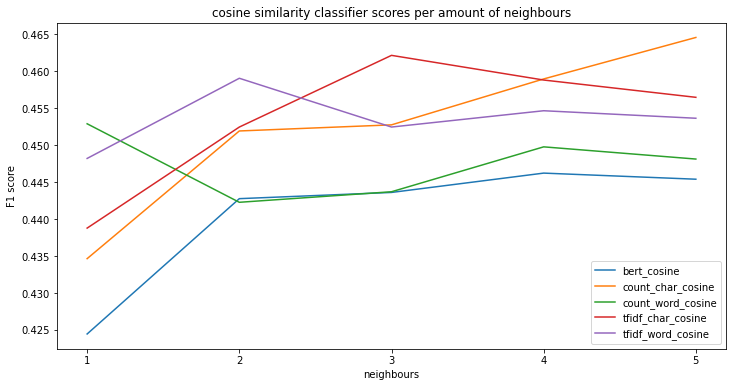

In [132]:
neighbours = [1,2,3,4,5]
bert_cosine = bert_sims[bert_sims['measure'] == 'cosine']['bcubed_F1']
count_char_cosine = count_char_sims[count_char_sims['measure'] == 'cosine'].groupby('neighbours')['bcubed_F1'].max()
count_word_cosine = count_word_sims[count_word_sims['measure'] == 'cosine'].groupby('neighbours')['bcubed_F1'].max()
tfidf_char_cosine = tfidf_char_sims[tfidf_char_sims['measure'] == 'cosine'].groupby('neighbours')['bcubed_F1'].max()
tfidf_word_cosine = tfidf_word_sims[tfidf_word_sims['measure'] == 'cosine'].groupby('neighbours')['bcubed_F1'].max()
fig = plt.figure(figsize=(12,6))
plt.title('cosine similarity classifier scores per amount of neighbours')
plt.plot(neighbours, bert_cosine)
plt.plot(neighbours, count_char_cosine)
plt.plot(neighbours,count_word_cosine)
plt.plot(neighbours, tfidf_char_cosine)
plt.plot(neighbours, tfidf_word_cosine)
plt.xlabel('neighbours')
plt.ylabel('F1 score')
plt.xticks(np.arange(1, 6))
plt.legend(['bert_cosine','count_char_cosine','count_word_cosine','tfidf_char_cosine','tfidf_word_cosine'])
plt.show()
